['images\\1.txt', 'images\\2.txt', 'images\\anita-austvika-6xqQ9whjU0c-unsplash.jpg', 'images\\anita-austvika-Cpi46UOtDjg-unsplash.jpg', 'images\\gabe-pierce-nAgS8ACVgmE-unsplash.jpg', 'images\\ish-frndz-3ahtisgkvWI-unsplash.jpg', 'images\\jonathan-caliguire-GuX5-uCberE-unsplash.jpg', 'images\\ludemeula-fernandes-9UUoGaaHtNE-unsplash (1).jpg', 'images\\luise-and-nic-Og2GuYH_Z1k-unsplash (1).jpg', 'images\\luise-and-nic-RmDk2NiitGg-unsplash.jpg', 'images\\mikhail-vasilyev-IFxjDdqK_0U-unsplash.jpg', 'images\\mircea-solomiea-3Oj0Ic-QPec-unsplash.jpg', 'images\\philip-oroni-XeeL0EjSYI8-unsplash.jpg', 'images\\samsung-memory-63976YzkHqM-unsplash.jpg', 'images\\samsung-memory-JtwzKGec2vc-unsplash.jpg', 'images\\silas-schneider-BUIULWsJQz4-unsplash.jpg', 'images\\silas-schneider-JxDpsez__Cc-unsplash.jpg']
images\1.txt is not valid; cannot identify image file 'C:\\Users\\avpfi\\Python Labs\\images\\1.txt'
images\2.txt is not valid; cannot identify image file 'C:\\Users\\avpfi\\Python Labs\\ima

,name,color model,format,channels,size,width,height,full path,image
0,anita-austvika-6xqQ9whjU0c-unsplash.jpg,RGB,JPEG,3,8.21,5504,8256,C:\Users\avpfi\Python Labs\images\anita-austvika-6xqQ9whjU0c-unsplash.jpg,
1,anita-austvika-Cpi46UOtDjg-unsplash.jpg,RGB,JPEG,3,5.96,7933,5289,C:\Users\avpfi\Python Labs\images\anita-austvika-Cpi46UOtDjg-unsplash.jpg,
2,gabe-pierce-nAgS8ACVgmE-unsplash.jpg,RGB,JPEG,3,5.76,4480,6720,C:\Users\avpfi\Python Labs\images\gabe-pierce-nAgS8ACVgmE-unsplash.jpg,
3,ish-frndz-3ahtisgkvWI-unsplash.jpg,RGB,JPEG,3,1.73,5390,6738,C:\Users\avpfi\Python Labs\images\ish-frndz-3ahtisgkvWI-unsplash.jpg,
4,jonathan-caliguire-GuX5-uCberE-unsplash.jpg,RGB,JPEG,3,2.02,2782,4165,C:\Users\avpfi\Python Labs\images\jonathan-caliguire-GuX5-uCberE-unsplash.jpg,
5,ludemeula-fernandes-9UUoGaaHtNE-unsplash (1).jpg,RGB,JPEG,3,2.24,5518,3679,C:\Users\avpfi\Python Labs\images\ludemeula-fernandes-9UUoGaaHtNE-unsplash (1).jpg,
6,luise-and-nic-Og2GuYH_Z1k-unsplash (1).jpg,RGB,JPEG,3,4.27,3925,5888,C:\Users\avpfi\Python Labs\images\luise-and-nic-Og2GuYH_Z1k-unsplash (1).jpg,
7,luise-and-nic-RmDk2NiitGg-unsplash.jpg,RGB,JPEG,3,5.50,4586,6879,C:\Users\avpfi\Python Labs\images\luise-and-nic-RmDk2NiitGg-unsplash.jpg,
8,mikhail-vasilyev-IFxjDdqK_0U-unsplash.jpg,RGB,JPEG,3,3.59,5184,3456,C:\Users\avpfi\Python Labs\images\mikhail-vasilyev-IFxjDdqK_0U-unsplash.jpg,
9,mircea-solomiea-3Oj0Ic-QPec-unsplash.jpg,RGB,JPEG,3,1.80,2397,3602,C:\Users\avpfi\Python Labs\images\mircea-solomiea-3Oj0Ic-QPec-unsplash.jpg,

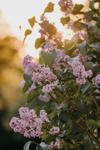
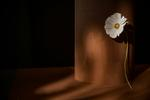
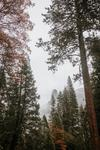
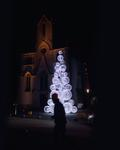
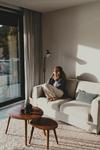
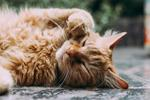
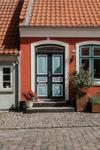
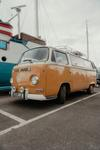
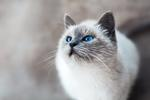
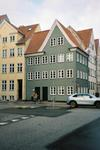
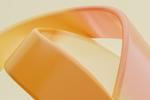
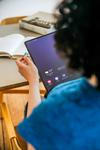
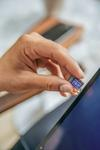
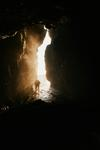
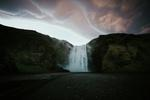

In [1]:
import os
import glob
import pandas as pd

from PIL import Image
from io import BytesIO

import base64


def get_thumbnail(path):
    image = Image.open(path)
    image.thumbnail((150, 150), Image.LANCZOS)
    return image


def image_base64(im):
    with BytesIO() as buffer:
        im.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()


def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'


def process_image_folder(folder_path):
    files = glob.glob(os.path.join(folder_path, '*'))
    data = []
    print(files)
    
    for file in files:
        try:
            with Image.open(file) as img:
                data.append({
                    'name': os.path.basename(file),
                    'color model': img.mode,
                    'format': img.format,
                    'channels': len(img.getbands()),
                    'size': round(os.path.getsize(file) / (1024 * 1024), 2),
                    'width': img.width,
                    'height': img.height,
                    'full path': os.path.abspath(file),
                    'image': get_thumbnail(file)
                })
        except (IOError, OSError) as error:    
            print(f"{file} is not valid; {error}")
            continue
    
    
    df = pd.DataFrame(data)
    pd.set_option('display.max_colwidth', None)
    df['image'] = df['image'].map(image_formatter)
    return df


folder_path = 'images' 
df = process_image_folder(folder_path)


from IPython.display import display, HTML
display(HTML(df.to_html(escape=False)))

In [2]:
import os
import random
from PIL import Image, ImageEnhance


def apply_dark_filter(image):
    filters = [
        (128, 0, 0), 
        (0, 128, 0),  
        (0, 0, 128),  
        (128, 128, 0),  
        (128, 0, 128),  
        (0, 128, 128) 
    ]
    filter_color = random.choice(filters)
    overlay = Image.new("RGB", image.size, filter_color)
    return Image.blend(image, overlay, alpha=0.6)  


def crop_to_square(image):
    width, height = image.size
    side = min(width, height)
    left = (width - side) // 2
    top = (height - side) // 2
    return image.crop((left, top, left + side, top + side))


def create_poster(input_folder, output_folder, output_name, rows, cols, image_size=500):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    files = [f for f in os.listdir(input_folder) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]
    images = []
    
    for _ in range(rows * cols):
        file = random.choice(files)
        image = Image.open(os.path.join(input_folder, file)).convert("RGB")
        image = crop_to_square(image).resize((image_size, image_size))
        image = apply_dark_filter(image)
        images.append(image)


    poster_width = cols * image_size
    poster_height = rows * image_size
    poster = Image.new("RGB", (poster_width, poster_height))
    
    for i in range(rows):
        for j in range(cols):
            x = j * image_size
            y = i * image_size
            poster.paste(images[i * cols + j], (x, y))
    
    output_path = os.path.join(output_folder, output_name)
    poster.save(output_path)
    print(f"Poster saved at {output_path}")


input_folder = 'images'
output_folder = 'images_poster'
create_poster(input_folder, output_folder, 'poster1.jpg', rows=2, cols=2)
create_poster(input_folder, output_folder, 'poster2.jpg', rows=3, cols=3)
create_poster(input_folder, output_folder, 'poster3.jpg', rows=5, cols=3)
create_poster(input_folder, output_folder, 'poster4.jpg', rows=2, cols=4)

Poster saved at images_poster\poster1.jpg
Poster saved at images_poster\poster2.jpg
Poster saved at images_poster\poster3.jpg
Poster saved at images_poster\poster4.jpg
